Code to merge the weather data into the laser strikes. This is done by location so the script will need to be updated and run for each location. This example is for PHX (Phoenix)

In [1]:
import pandas as pd

Update the line below for the location of the METAR weather CSV file (in this case PHX)

In [2]:
dfW = pd.read_csv("C:/Users/PHX_201101010000_202101310000.csv")

C:\Users\davis\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Update the line below for the location of the laser combined file 

In [25]:
df = pd.read_csv("C:/Users/laser_combined.csv")

C:\Users\davis\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11,14,16,18,33,36,37,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
dfL = df[(df.ncport == 'PHX')]

In [27]:
dfL['date2'] = pd.to_datetime(dfL.date).dt.tz_localize(None)

C:\Users\davis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
left = dfL.sort_values('date2')

In [14]:
dfW['date2'] = pd.to_datetime(dfW['valid'])

In [29]:
dfN = pd.merge_asof(left, dfW, on="date2")

In [39]:
df_mapping = pd.DataFrame({
    'skyc1': ['CLR', 'FEW', 'SCT', 'BKN', 'OVC', 'VV ', 'M'],
})
sort_mapping = df_mapping.reset_index().set_index('skyc1')
dfN['skyc1_num'] = dfN['skyc1'].map(sort_mapping['index'])

,X_id,date,callsign,acType,remarks,ncport,orig.faa,dest.faa,com.pat,com.cnt,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,skyc1_num
634,5d2de4442834ae4512063b71,2016-03-27T07:35:00.000Z,AAL636,"A321, AIRBUS, A-321",Aircraft reported cockpit illuminated by a gr...,PHX,LAX,PHX,10 NM NW of PHX,1,...,M,M,M,M,M,M,M,66.92,KPHX 270651Z 25007KT 10SM CLR 19/M10 A2989 RMK...,0
468,5d2de26e2834ae451201a53f,2015-05-26T11:28:00.000Z,AAL721,"A321, AIRBUS, A-321",Aircraft reported cockpit illuminated by a gr...,PHX,PHX,LAX,8 NM E of PHX,1,...,M,M,M,M,M,M,M,71.52,KPHX 261051Z 00000KT 10SM CLR 23/05 A2989 RMK ...,0
906,5d2de2ea2834ae451202e3ba,2018-02-03T10:56:00.000Z,N880AM,"PC12, PILATUS, Eagle",Aircraft reported cockpit illuminated by a gr...,PHX,SLC,DVT,10 miles NNW $ 10 miles NNW of Phoenix,2,...,M,M,M,M,M,M,M,M,KPHX 031055Z AUTO 09004KT 10SM CLR 12/M03 A300...,0
471,5d2de2732834ae451201b1e2,2015-05-28T13:41:00.000Z,SWA1974,"B737, BOEING, 737-700",Aircraft reported cockpit illuminated by a gr...,PHX,PHX,OAK,13NM SW of PHX,1,...,M,M,M,M,M,M,M,69.27,KPHX 281251Z 12004KT 10SM CLR 22/03 A2990 RMK ...,0
904,5d2de37b2834ae4512046544,2018-01-25T10:01:00.000Z,MSQT591,"P28A, AICSA, Archer 2",Aircraft reported cockpit illuminated by a gr...,PHX,VFR,VFR,25 NMNW ofPHX,1,...,M,M,M,M,M,M,M,M,KPHX 251000Z AUTO 00000KT 10SM CLR 09/M07 A300...,0
903,5d2de3b22834ae451204f7f3,2018-01-18T10:35:00.000Z,SWA159,"B737, BOEING, 737-700",Aircraft reported cockpit illuminated by a gr...,PHX,PHX,MCO,6 NM W ofPHX,1,...,M,M,M,M,M,M,M,M,KPHX 181035Z AUTO 00000KT 10SM CLR 10/M02 A301...,0
474,5d2de3792834ae4512045dc7,2015-06-07T11:06:00.000Z,AAL425,"A321, AIRBUS, A-321",Aircraft reported cockpit illuminated by a gr...,PHX,PHX,SEA,10 NMNE ofPHX,1,...,M,M,M,M,M,M,M,75.92,KPHX 071051Z 06006KT 10SM CLR 24/09 A2980 RMK ...,0
902,5d2de2eb2834ae451202e668,2018-01-17T09:26:00.000Z,MSQT55,"PA44, AICSA, PA-44 Seminole",Aircraft reported cockpit illuminated by a gr...,PHX,DVT,DVT,4 miles west of Phoenix,1,...,M,M,M,M,M,M,M,M,KPHX 170925Z AUTO 13006KT 10SM CLR 13/M03 A301...,0
901,5d2de3072834ae4512032e5d,2018-01-11T09:29:00.000Z,N108ND,"P28A, AICSA, Archer 2",Aircraft reported cockpit illuminated by a gr...,PHX,VFR,PHX,3 NM SE of PHX,1,...,M,M,M,M,M,M,M,M,KPHX 110925Z AUTO 00000KT 10SM CLR 11/09 A3009...,0
477,5d2de26d2834ae451201a015,2015-06-14T10:40:00.000Z,JBU135,"A320, AIRBUS, A-320","0530, 8 miles east of PHX, at 4,000 feet, hea...",PHX,PHX,JFK,8 miles east of PHX,1,...,M,M,M,M,M,M,M,85.47,KPHX 140951Z 30007KT 10SM CLR 32/06 A2965 RMK ...,0


In [45]:
dfN = dfN.sort_values('skyc1_num')

In [46]:
dfN.to_csv(r'C:/Users/davis/Documents/DAEN 690/combined_PHX.csv', index = False)

The lines below create a graphic of the cloud coverage.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
colors = {'CLR': "#E69F00", 'FEW': "#56B4E9", 'SCT': "#009E73", 'BKN': "#F0E442", 'OVC': "#CC79A7", 'M': "#0072B2", 'VV ': "#000000"}

Text(0.5, 1.0, 'Cloud Coverage for Strikes near PHX')

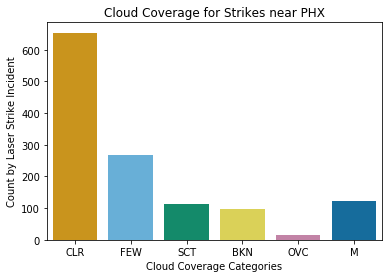

In [47]:
sns.countplot(x ='skyc1', data = dfN, palette = colors)
plt.xlabel('Cloud Coverage Categories')
plt.ylabel('Count by Laser Strike Incident')
plt.title('Cloud Coverage for Strikes near PHX')
